# Оптимизационные задачи

### Задача 1. Минимизация гладкой функции

In [1]:
import scipy.optimize as opt
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

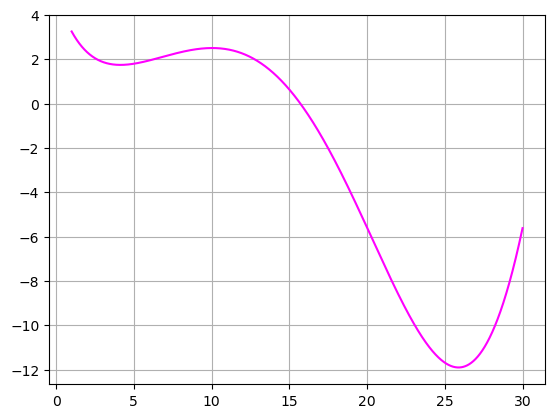

In [2]:
#исходная функция
def f(x):
    return(np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-x/2))
    #return(3*np.cos((10*x)/7) + np.exp(x/10))

x = np.arange(1, 30, 0.001)
plt.plot(x, f(x), color = 'magenta')
plt.grid()
plt.show()

Зададим начальное приближение x0 = 2

In [3]:
#opt.minimize(f, x0=2)
result = opt.minimize(f, x0=2, method='BFGS')
result

      fun: 1.7452682903447336
 hess_inv: array([[5.98752645]])
      jac: array([-2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627628])

Проделаем то же самое при начальном приближении x0 = 30

In [4]:
result1 = opt.minimize(f, x0=30, method='BFGS')
result1

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

In [5]:
res = open('res_task1', 'w')
res.write(str(np.round(f(result.x[0]), 2))+' '+str(np.round(f(result1.x[0]), 2)))
res.close()

### Задача 2. Глобальная оптимизация

In [13]:
a = opt.differential_evolution(f,[[1,30]])
a

     fun: -11.898894665981281
     jac: array([-3.55271338e-07])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019266])

In [12]:
res = open('res_task2', 'w')
res.write(str(np.round(f(a.x[0]), 2)))
res.close()

### Задача 3. Минимизация негладкой функции

In [8]:
def h(x):
    return int(f(x))

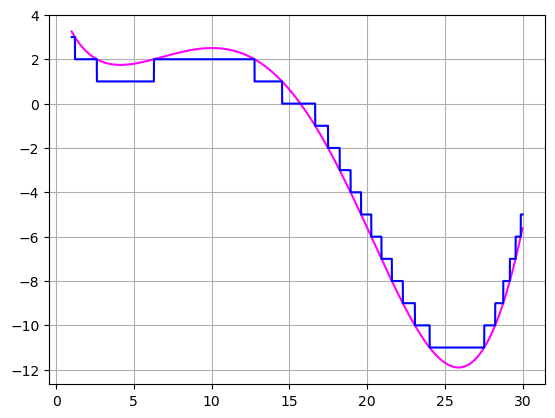

In [9]:
x = np.arange(1, 30, 0.001)
plt.plot(x, f(x), color = 'magenta')
plt.plot(x, f(x).astype('int'), color='blue')
plt.grid()
plt.show()

In [14]:
r = opt.minimize(h, x0=30, method='BFGS')

res = open('res_task3', 'w')
res.write(str(np.round(h(r.x[0]), 2)) + ' ')
re = opt.differential_evolution(h, [[1,30]])
res.write(str(np.round(h(re.x[0]), 2)))
res.close()

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])